# DLISIO in a Nutshell

## Importing

In [1]:
%matplotlib inline

import os
import pandas as pd
import dlisio
import matplotlib.pyplot as plt
import numpy as np
import numpy.lib.recfunctions as rfn

In [2]:
filepath = "ConocoPhillips Pharos-1 NGI Processed Images Static_Dynamic.dlis"

In [3]:
with dlisio.load(filepath) as file:
    for d in file:
        for origin in d.origin:
            print(origin.describe())
        for fram in d.frames:
            print(fram.describe())
            for channel in d.channels:
                print(channel.describe())

------
Origin
------
name   : WELL-Pharos-1
origin : 48
copy   : 0

Logical file ID          : ConPr_R1L3Down_S033_NGIT_PPC_MAST_HNGC_HNGS
File set name and number : CONPR_R1L3DOWN_S033_NGIT_PPC_MAST_HNGC_HNGS / 1
File number and type     : 0 / CUSTOMER

Field                   : Poseidon
Well (id/name)          :  / Pharos-1
Produced by (code/name) : 440 / Schlumberger
Produced for            : ConocoPhillips Australia
Created                 : 2014-07-04 01:49:36

Created by              : Techlog, (version: 2013.3.0 (rev: 124711))
Other programs/services : WELL-Pharos-1


------
Origin
------
name   : DATASET-NGI-ENP_13170-15116ft_DM
origin : 49
copy   : 0

Logical file ID          : ConPr_R1L3Down_S033_NGIT_PPC_MAST_HNGC_HNGS
File set name and number : CONPR_R1L3DOWN_S033_NGIT_PPC_MAST_HNGC_HNGS / 1
File number and type     : 0 / CUSTOMER

Field                   : Poseidon
Well (id/name)          :  / Pharos-1
Produced by (code/name) : 440 / Schlumberger
Produced for            : 

In [4]:
with dlisio.load(filepath) as file:
    for d in file:
        depth_channels = d.match('TDEP')
        for channel in depth_channels:
            print(channel.name)
            depth_array = channel.curves()
            max_depth = depth_array[-1]
            
        image_channels = d.match('NGI STATIC IMAGE')
        
        for channel in image_channels:
            print(channel.name)
            image_array = channel.curves()

TDEP
NGI STATIC IMAGE


In [5]:
depth_array.shape

(233621,)

In [6]:
image_array.shape

(233621, 261)

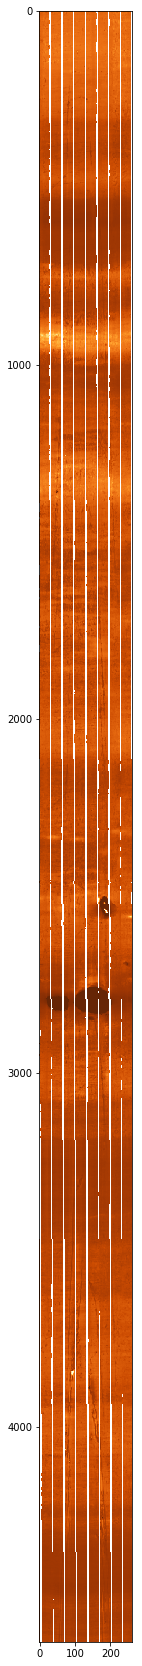

In [47]:
plt.figure(figsize = (24,30))
image_array[image_array == -9999.] = np.nan
limit = int(100000 + max_depth)
plt.imshow(image_array[100000:limit,:], cmap='YlOrBr')

### 1. Remove nans at beginning and end

In [38]:
mask = np.all(np.isnan(image_array) | np.equal(image_array, 0), axis=1)
new_image_array = image_array[~mask]

In [41]:
new_depth_array = depth_array[~mask]

In [18]:
image_array[20000:20100,:]

array([[ 93.585,  93.585,  93.33 , ...,  98.685,  98.685,  93.585],
       [ 98.43 ,  93.585,  93.33 , ...,  94.095,  98.685,  98.43 ],
       [ 93.585,  93.585,  98.175, ...,  94.095,  98.685,  93.585],
       ...,
       [115.005, 115.005, 111.18 , ..., 105.825, 107.61 , 107.865],
       [115.005, 115.005, 107.355, ..., 109.395, 111.435, 111.69 ],
       [111.435, 111.435, 107.355, ..., 109.395, 107.61 , 111.69 ]],
      dtype=float32)

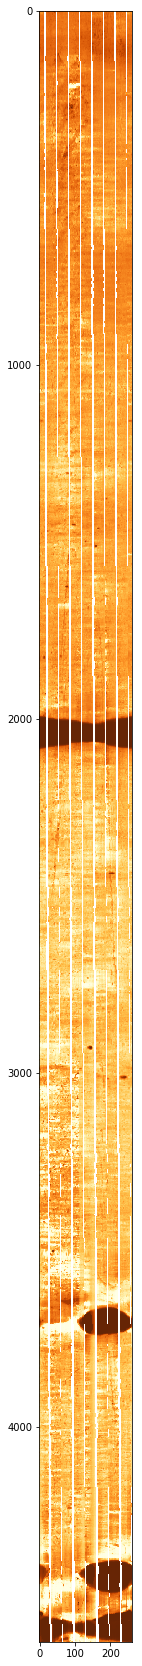

In [46]:
plt.figure(figsize = (24,30))
limit = int(100000 + max_depth)
plt.imshow(new_image_array[100000:limit,:], cmap='YlOrBr')
#plt.ylim(new_depth_array.max(), new_depth_array.min())

In [ ]:
from scipy import interpolate

In [48]:
x = np.arange(0, new_image_array.shape[1])
y = np.arange(0, new_image_array.shape[0])
#mask invalid values
array = np.ma.masked_invalid(new_image_array)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~new_image_array.mask]
y1 = yy[~new_image_array.mask]
newarr = new_image_array[~new_image_array.mask]

GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                             method='cubic')

AttributeError: 'numpy.ndarray' object has no attribute 'mask'

In [8]:
with dlisio.load(filepath) as file:
    for d in file:
        print(d.describe())
        for fram in d.frames:
            print(fram.describe())
            for channel in d.channels:
                print(channel.describe())

------------
Logical File
------------
Description  : dlis(ConPr_R1L3Down_S033_NGIT_PPC_MAST_HNGC_HNGS)
Frames       : 1
Channels     : 38
Object count : 810

Known objects
--
FILE-HEADER : 1
ORIGIN      : 2
PARAMETER   : 766
CHANNEL     : 38
TOOL        : 2
FRAME       : 1


-----
Frame
-----
name   : 1B
origin : 49
copy   : 0

Channel indexing
--
Indexed by    : BOREHOLE-DEPTH
Interval      : [4014.239013671875, 4607.6337890625]
Direction     : INCREASING
Index channel : Channel(TDEP)

Channels
--
TDEP              ASSOC_CAL         AX                AY                AZ
BS                CAL1              CAL2              CAL3              CAL4
FX                FY                FZ                HAZIM             NGI
DYNAMIC IMAGE NGI STATIC IMAGE  P1AZ_NGI_UPPER    P1NO_NGI_UPPER    PAD_1
PAD_2             PAD_3             PAD_4             PAD_5             PAD_6
PAD_7             PAD_8             RADIUS_A          RADIUS_B          RADIUS_C
RADIUS_D          RADIUS_E        

In [9]:
with dlisio.load(filepath) as file:
    for d in file:
        for origin in d.origin:
            print(origin.describe())

------
Origin
------
name   : WELL-Pharos-1
origin : 48
copy   : 0

Logical file ID          : ConPr_R1L3Down_S033_NGIT_PPC_MAST_HNGC_HNGS
File set name and number : CONPR_R1L3DOWN_S033_NGIT_PPC_MAST_HNGC_HNGS / 1
File number and type     : 0 / CUSTOMER

Field                   : Poseidon
Well (id/name)          :  / Pharos-1
Produced by (code/name) : 440 / Schlumberger
Produced for            : ConocoPhillips Australia
Created                 : 2014-07-04 01:49:36

Created by              : Techlog, (version: 2013.3.0 (rev: 124711))
Other programs/services : WELL-Pharos-1


------
Origin
------
name   : DATASET-NGI-ENP_13170-15116ft_DM
origin : 49
copy   : 0

Logical file ID          : ConPr_R1L3Down_S033_NGIT_PPC_MAST_HNGC_HNGS
File set name and number : CONPR_R1L3DOWN_S033_NGIT_PPC_MAST_HNGC_HNGS / 1
File number and type     : 0 / CUSTOMER

Field                   : Poseidon
Well (id/name)          :  / Pharos-1
Produced by (code/name) : 440 / Schlumberger
Produced for            : 

## Reading a full dlis file

### But most likely we want a single data frame of every curve, no matter which frame it came from.  So we write a bit more code to look through each frame, then look at each channel and get the curve name and unit information along with it.  We will also save the information about which internal file and which frame each curve resides in.  

In [10]:
curves_L = []
curves_name = []
longs = []
unit = []
files_L = []
files_num = []
frames = []
frames_num = []
with dlisio.load(filepath) as file:
    for d in file:
        files_L.append(d)
        for fram in d.frames:
            frames.append(fram)
            for channel in d.channels:
                curves_name.append(channel.name)
                longs.append(channel.long_name)
                unit.append(channel.units)
                files_num.append(len(files_L))
                frames_num.append(len(frames))
                curves = channel.curves()
                curves_L.append(curves)

KeyboardInterrupt: 

In [ ]:
curve_index = pd.DataFrame(
{'Curve': curves_name,
'Long': longs,
'Unit': unit,
'Internal_File': files_num,
'Frame_Number': frames_num
})

In [ ]:
curve_index

## Creating a Pandas dataframe for the entire .dlis file

### We have to be careful creating a dataframe for the whole .dlis file as often there are some curves that represent mulitple values (numpy array of list values).  So, you can use something like:

df = pd.DataFrame(data=curves_L, index=curves_name).T

### to view the full dlis file with lists as some of the curve values.

### Or we will use the code below to process each curve's 2D numpy array, stacking it if the curve contains multiple values per sample.  Then we convert each curve into its own dataframe (uniquifying the column names by adding a .1, .2, .3...etc).  Then, to preserve the order with the curve index above, append each data frame together in order to build the final dlis full dataframe.

In [ ]:
def df_column_uniquify(df):
    df_columns = df.columns
    new_columns = []
    for item in df_columns:
        counter = 0
        newitem = item
        while newitem in new_columns:
            counter += 1
            newitem = "{}_{}".format(item, counter)
        new_columns.append(newitem)
    df.columns = new_columns
    return df

In [ ]:
curve_df = pd.DataFrame()
name_index = 0
for c in curves_L:
    name = curves_name[name_index]
    np.vstack(c)
    try:
        num_col = c.shape[1]
        col_name = [name] * num_col
        df = pd.DataFrame(data=c, columns=col_name)
        name_index = name_index + 1
        df = df_column_uniquify(df)
        curve_df = pd.concat([curve_df, df], axis=1)
    except:
        num_col = 0
        df = pd.DataFrame(data=c, columns=[name])
        name_index = name_index + 1
        curve_df = pd.concat([curve_df, df], axis=1)
        continue

In [ ]:
curve_df.head()

### Then we can set the index and start making some plots.

In [ ]:
curve_df = df_column_uniquify(curve_df)
#curve_df['DEPTH_Calc_ft'] = curve_df.loc[:,'TDEP'] * 0.0083333 #0.1 inch/12 inches per foot
curve_df = curve_df.set_index("DVER")
curve_df.index.names = [None]
curve_df = curve_df.replace(-999.25,np.nan)

In [ ]:
curve_df.head()

In [ ]:
curve_df.iloc[:,0:45].plot(kind='line',subplots=True, figsize=(10,100),grid=True, legend='reverse')

In [ ]:
subset = curve_df.loc[:,['DEVI','DRHO']]

In [ ]:
import plotly_express as px
px.line(subset, x='DEVI', y=None, range_y=[1500,0], width=500)

In [ ]:
px.line(subset, x='DRHO', y=None, range_y=[1500,0], width=500)

# Hopefully that is enough code to get you started working with DLISIO.  There is much more functionality which can be accessed with help(dlisio)